# Time Series Prediction

from Article: Forecasting with Chronos
https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-chronos.html



In [ ]:
# # !pip install autogluon  # failed
#!pip install git+https://github.com/amazon-science/chronos-forecasting.git


In [16]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
from tqdm.auto import tqdm

[2024-06-25 17:35:54,366] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [5]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="cpu", 
  torch_dtype=torch.bfloat16,
)

/home/ud1eca749ccbc9895ed00eccd65bc347/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [6]:
data = TimeSeriesDataFrame(
    "https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_tiny/train.csv"
    #"anomaly.csv"
)
data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [7]:
prediction_length = 24
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="chronos_tiny",
)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels/ag-20240625_173615'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.18
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #80-Ubuntu SMP Mon May 15 15:18:26 UTC 2023
CPU Count:          192
GPU Count:          0
Memory Avail:       986.92 GB / 1007.56 GB (98.0%)
Disk Space Avail:   353974.96 GB / 372529.03 GB (95.0%)
Setting presets to: chronos_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'h'
Provided train_data has 13520 rows, 20 

In [8]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "tiny",
            "batch_size": 64,
            "device": "cpu",
        }
    },
    skip_model_selection=True,
    verbosity=0,
)

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

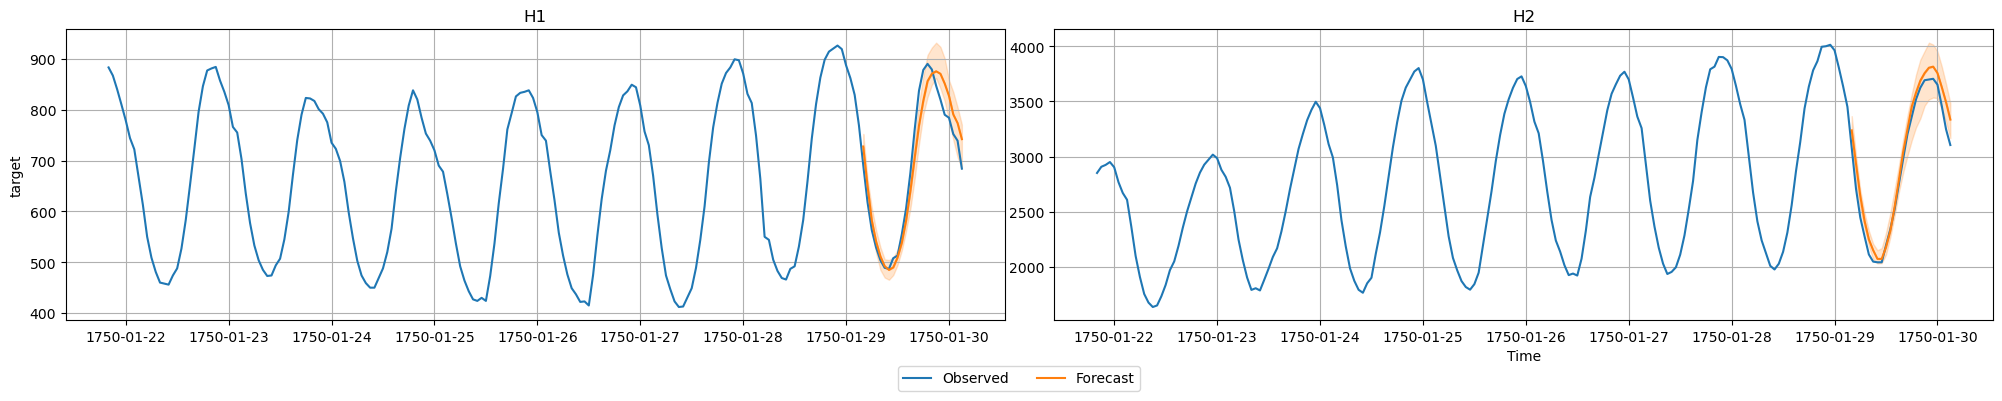

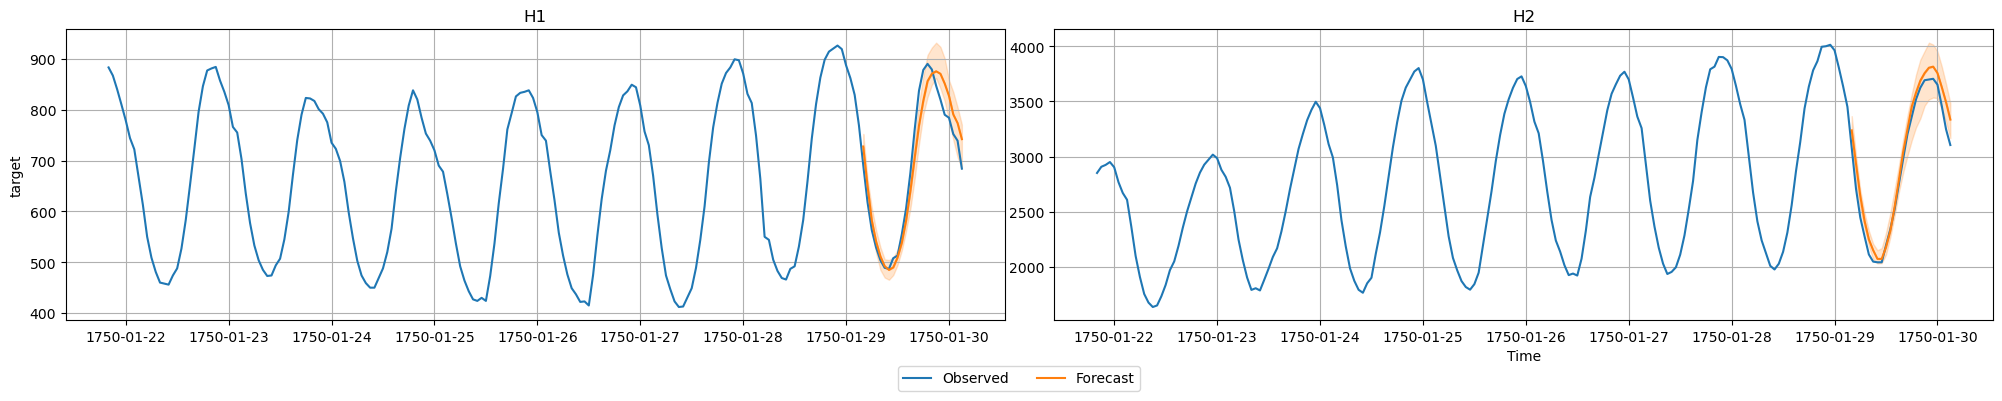

In [9]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data, 
    predictions=predictions, 
    item_ids=["H1", "H2"],
    max_history_length=200,
)

# Anomaly

In [10]:
data = TimeSeriesDataFrame(
    "anomalySeries.csv"
)
data.head()

target
item_id timestamp                      
Series  1750-01-01 00:00:00   91.979918
        1750-01-01 00:30:00   87.912618
        1750-01-01 01:00:00   86.553241
        1750-01-01 01:30:00  103.214549
        1750-01-01 02:00:00  111.290193

In [14]:
prediction_length = 24
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="chronos_tiny",
)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels/ag-20240510_211142'
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.18
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #116-Ubuntu SMP Wed Apr 17 09:17:56 UTC 2024
CPU Count:          224
GPU Count:          0
Memory Avail:       425.02 GB / 440.61 GB (96.5%)
Disk Space Avail:   61545.59 GB / 114157.16 GB (53.9%)
Setting presets to: chronos_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '30min'
Provided train_data has 1464 rows, 1

In [11]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "tiny",
            "batch_size": 64,
            "device": "cpu",
        }
    },
    skip_model_selection=True,
    verbosity=0,
)

In [12]:
predictions = predictor.predict(train_data)

In [15]:
Len = data.shape[0]
predictor.plot(
    data=data, 
    predictions=predictions, 
    item_ids=["Series"],
    max_history_length=Len,
)

KeyError: 'Series'

# Generate Clean Anomaly data

In [12]:
# df = pd.read_csv('anomaly.csv')
# L = []
# for d in range(1,32): # each day for 31 days starting at day 1
#     for h in range(0,24): # each hour
#         for m in range(0,2):  # every 30 min
#             L.append(f"1750-01-{d:02d} {h:02d}:{m*30:02d}:00")
# Len = len(L)
# df = df.loc[:Len-1,['item_id','timestamp','target']]
# df.timestamp = L
# df = df[['item_id','timestamp','target']]
# df.to_csv('anomalySeries.csv', index= False)
# df


In [ ]:
df

In [ ]:
len(L)